#### Set Up

In [1]:
# Import Python Notebooks
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler

/Users/christianbarker/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Set Pandas to view all rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# Import CSV Data
master = pd.read_csv('data/large_train_sample.csv')
test_data_raw = pd.read_csv('data/test_data.csv')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

#### Data Cleaning

In [4]:
master.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K


In [5]:
# Deleting '?' Values in Master
master = master.loc[master['workclass'] != ' ?']
master = master.loc[master['native-country'] != ' ?']
master = master.loc[master['occupation'] != ' ?']

In [6]:
# Concating train and test for column adding
test_data_raw['Test(0), Train(1)'] = 0
master['Test(0), Train(1)'] = 1

# Merging Train and Test data for Manipulation
master = pd.concat([test_data_raw, master], axis = 0)

/Users/christianbarker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


#### Dummies

In [7]:
# Create Dummy Variable for Wage and Sex
master = pd.concat([master, pd.get_dummies(master['wage'], drop_first = True)], axis = 1)            # Wage Dummies
master = pd.concat([master, pd.get_dummies(master['workclass'], drop_first = True)], axis = 1)       # WorkClass Dummies
master = pd.concat([master, pd.get_dummies(master['marital-status'], drop_first = True)], axis = 1)  # Marital-Status Dummies
master = pd.concat([master, pd.get_dummies(master['occupation'], drop_first = True)], axis = 1)      # Occupation Dummies
master = pd.concat([master, pd.get_dummies(master['relationship'], drop_first = True)], axis = 1)    # Relationship Dummies
master = pd.concat([master, pd.get_dummies(master['sex'], drop_first = True)], axis = 1)             # Sex Dummies

In [8]:
# Remove Space from Begining of Column
master.columns = master.columns.str.lstrip()

In [9]:
# Unmerged Train and Test data
test_data = master.loc[master['Test(0), Train(1)'] == 0]
master = master.loc[master['Test(0), Train(1)'] == 1]

test_data = test_data.drop('Test(0), Train(1)', axis = 1)
master = master.drop('Test(0), Train(1)', axis = 1)

display(test_data.shape)
display(master.shape)

(16281, 49)

(30162, 49)

#### Viewing Dummies by Group

In [10]:
work_class = pd.concat([master['>50K'], pd.get_dummies(master['workclass'], drop_first = True)], axis = 1)            # Wage Dummies
marital_class = pd.concat([master['>50K'], pd.get_dummies(master['marital-status'], drop_first = True)], axis = 1)            # Wage Dummies
occupation_class = pd.concat([master['>50K'], pd.get_dummies(master['occupation'], drop_first = True)], axis = 1)            # Wage Dummies
relationship_class = pd.concat([master['>50K'], pd.get_dummies(master['relationship'], drop_first = True)], axis = 1)            # Wage Dummies
sex_class = pd.concat([master['>50K'], pd.get_dummies(master['sex'], drop_first = True)], axis = 1)            # Wage Dummies

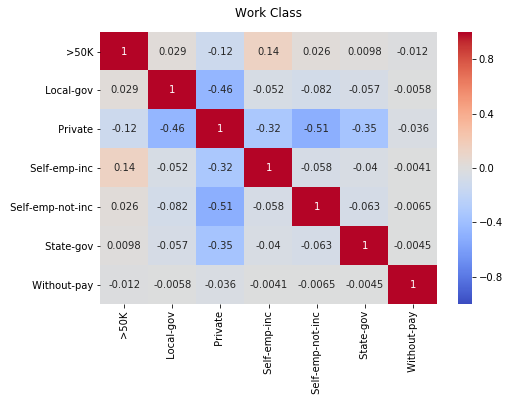

In [11]:
plt.figure(figsize = (7.55, 5))

sns.heatmap(work_class.corr(),
           vmin = -1, vmax = 1,
           cmap = 'coolwarm',
           annot = True);

plt.title('Work Class', pad = 15);

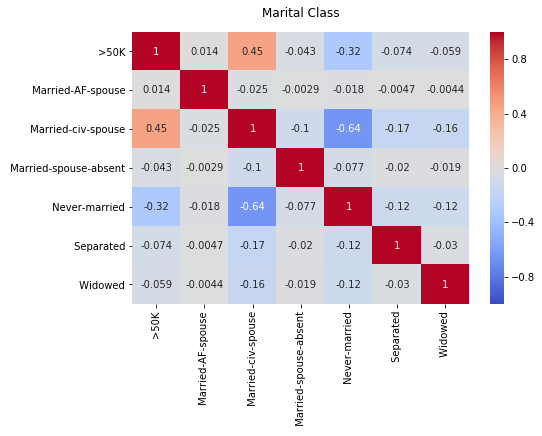

In [12]:
plt.figure(figsize = (7.55, 5))

sns.heatmap(marital_class.corr(),
           vmin = -1, vmax = 1,
           cmap = 'coolwarm',
           annot = True);

plt.title('Marital Class', pad = 15);

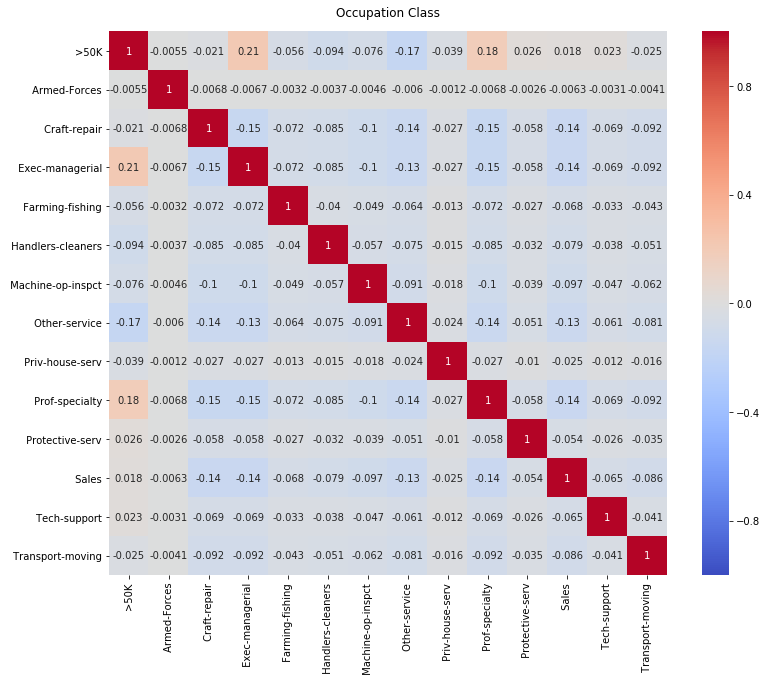

In [13]:
plt.figure(figsize = (12.5, 10))

sns.heatmap(occupation_class.corr(),
           vmin = -1, vmax = 1,
           cmap = 'coolwarm',
           annot = True);

plt.title('Occupation Class', pad = 15);

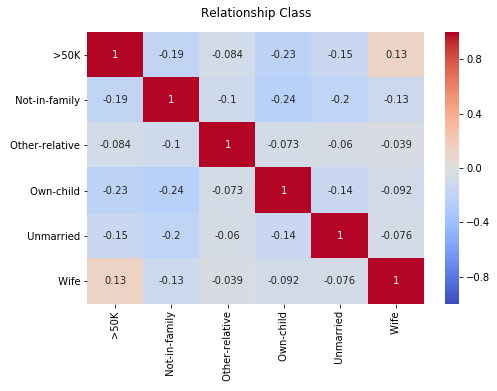

In [14]:
plt.figure(figsize = (7.55, 5))

sns.heatmap(relationship_class.corr(),
           vmin = -1, vmax = 1,
           cmap = 'coolwarm',
           annot = True);

plt.title('Relationship Class', pad = 15);

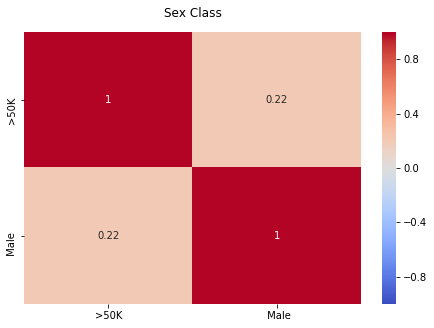

In [15]:
plt.figure(figsize = (7.55, 5))

sns.heatmap(sex_class.corr(),
           vmin = -1, vmax = 1,
           cmap = 'coolwarm',
           annot = True);

plt.title('Sex Class', pad = 15);

#### Data Visualization

In [16]:
# Visualization
display(master.shape)
master.head(2)

(30162, 49)

,age,capital-gain,capital-loss,education,education-num,fnlwgt,hours-per-week,marital-status,native-country,occupation,relationship,sex,wage,workclass,>50K,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Male
0,39,2174,0,Bachelors,13,77516,40,Never-married,United-States,Adm-clerical,Not-in-family,Male,<=50K,State-gov,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,50,0,0,Bachelors,13,83311,13,Married-civ-spouse,United-States,Exec-managerial,Husband,Male,<=50K,Self-emp-not-inc,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


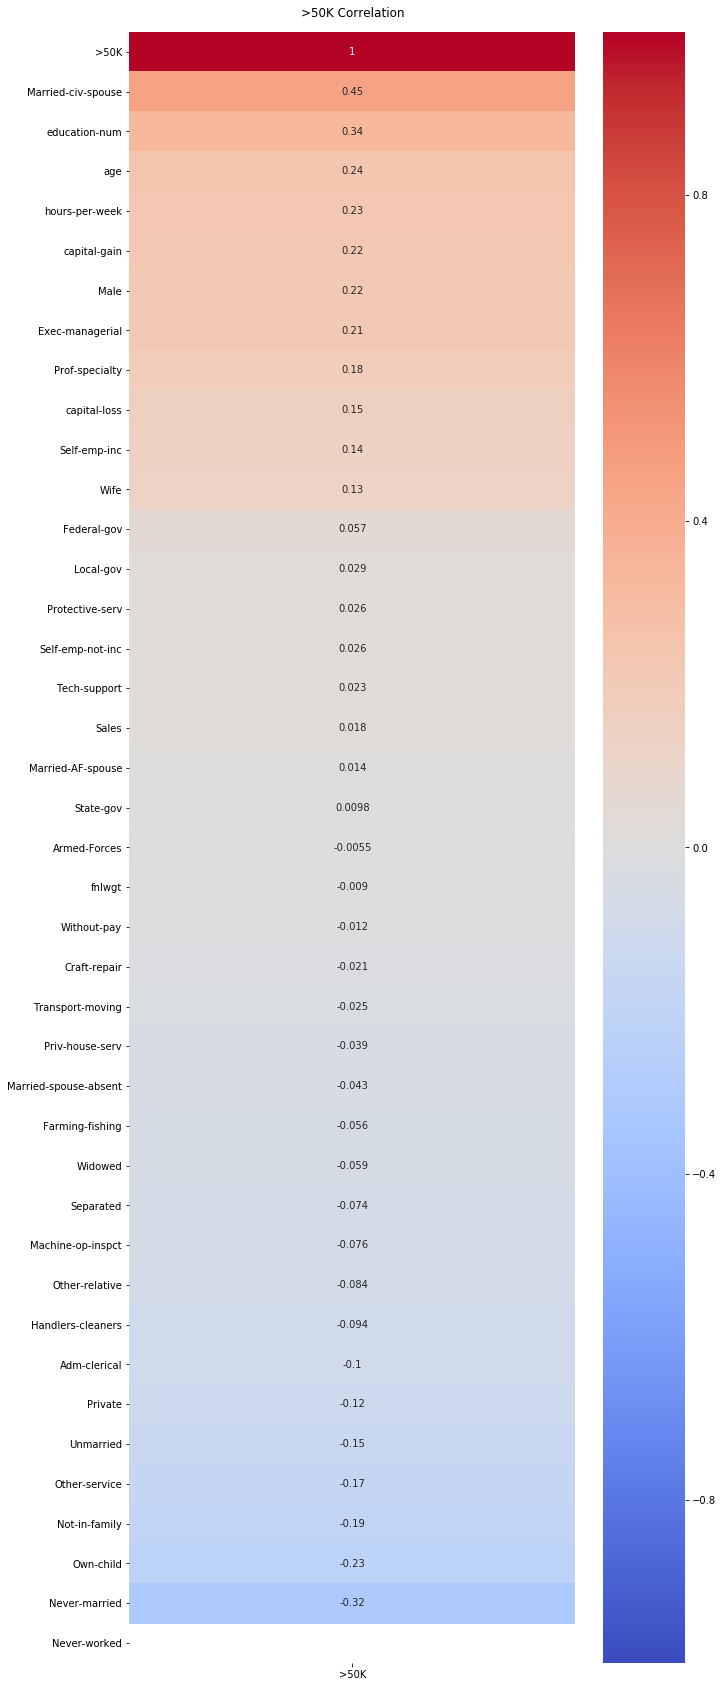

In [17]:
# Create Correlation 
master_wage_corr = pd.DataFrame(master.corr()['>50K'])

# Create Heatmap for '>50K'
plt.figure(figsize = (10, 30))

sns.heatmap(master_wage_corr.sort_values(by = '>50K', ascending = False),
           vmin = -1, vmax = 1,
           cmap = 'coolwarm',
           annot = True);

plt.title('>50K Correlation', pad = 15);

#### Set Variables

In [18]:
# X = master[['Married-civ-spouse', 
#       'education-num', 
#       'age', 
#       'hours-per-week', 
#       'capital-gain', 
#       'Male', 
#       'Exec-managerial', 
#       'Prof-specialty', 
#       'Never-married', 
#       'Own-child', 
#       'Not-in-family']]

# X = master[['Married-civ-spouse', 
#       'education-num', 
#       'Exec-managerial', 
#       'Prof-specialty', 
#       'Never-married', 
#       'Own-child', 
#       'Not-in-family']]

y = master['>50K']

In [19]:
X = master[['age', 
            'capital-gain', 
            'capital-loss', 
            'education-num', 
            'hours-per-week', 
            'Self-emp-not-inc', 
            'Without-pay', 
            'Married-civ-spouse', 
            'Never-married', 
            'Exec-managerial', 
            'Farming-fishing', 
            'Handlers-cleaners', 
            'Other-service', 
            'Priv-house-serv', 
            'Not-in-family', 
            'Own-child', 
            'Wife', 
            'Male',
            'Prof-specialty',
            'Federal-gov']]

In [20]:
X.shape

(30162, 20)

#### Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Modeling

#### Logistic Regression

In [23]:
# Instantiates and Fits Naive Bayes 
logreg = LogisticRegression()

# Fit and Run model
logreg.fit(X_train, y_train)

print(f'Logistic Regression Train Score: {logreg.score(X_train, y_train).round(2)}')
print(f'Logistic Regression Test Score: {logreg.score(X_test, y_test).round(2)}')

# Create DataFrame with Results
logreg_scores = pd.DataFrame([logreg.score(X_train, y_train).round(2), logreg.score(X_test, y_test).round(2)]).T
logreg_scores.columns = 'Train', 'Test'
logreg_scores.rename(index = {0 : 'Logistic Regression'}, inplace = True)

Logistic Regression Train Score: 0.84
Logistic Regression Test Score: 0.85


In [24]:
logreg_coef = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(logreg.coef_).round(2).T], axis = 1)
logreg_coef.columns = 'Metric', 'Coef'
logreg_coef.sort_values(by = 'Coef', ascending = False)

,Metric,Coef
7,Married-civ-spouse,1.54
16,Wife,1.08
17,Male,0.76
9,Exec-managerial,0.65
19,Federal-gov,0.52
18,Prof-specialty,0.47
3,education-num,0.25
0,age,0.02
4,hours-per-week,0.02
1,capital-gain,0.00


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#### Naive Bayes

In [26]:
# Instantiates and Fits Naive Bayes 
mnb = MultinomialNB()

# Fit and Run model
mnb.fit(X_train, y_train)
print(f'Naive Bayes Training Score: {mnb.score(X_train, y_train).round(2)}')
print(f'Naive Bayes Testing Score: {mnb.score(X_test, y_test).round(2)}')

# Create DataFrame with Results
naive_bayes_scores = pd.DataFrame([mnb.score(X_train, y_train).round(2), mnb.score(X_test, y_test).round(2)]).T
naive_bayes_scores.columns = 'Train', 'Test'
naive_bayes_scores.rename(index = {0 : 'Naive Bayes'}, inplace = True)

Naive Bayes Training Score: 0.77
Naive Bayes Testing Score: 0.77


In [27]:
nb_coef = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(mnb.coef_).round(2).T], axis = 1)
nb_coef.columns = 'Metric', 'Coef'
nb_coef.sort_values(by = 'Coef', ascending = False)

,Metric,Coef
1,capital-gain,-0.07
2,capital-loss,-3.15
4,hours-per-week,-4.55
0,age,-4.59
3,education-num,-5.92
7,Married-civ-spouse,-8.53
17,Male,-8.54
9,Exec-managerial,-9.75
18,Prof-specialty,-9.79
14,Not-in-family,-10.61


#### KNN

In [28]:
k_3 = KNeighborsClassifier(n_neighbors = 3)
k_3.fit(X_train, y_train)

k_5 = KNeighborsClassifier(n_neighbors = 5)
k_5.fit(X_train, y_train)

k_15 = KNeighborsClassifier(n_neighbors = 15)
k_15.fit(X_train, y_train)

k_25 = KNeighborsClassifier(n_neighbors = 25)
k_25.fit(X_train, y_train);

print("k-nearest neighbors training accuracy with k = 3: " + str(k_3.score(X_train, y_train).round(2)))
print("k-nearest neighbors testing accuracy with k = 3: " + str(k_3.score(X_test, y_test).round(2)))

print(' ')

print("k-nearest neighbors training accuracy with k = 5: " + str(k_5.score(X_train, y_train).round(2)))
print("k-nearest neighbors testing accuracy with k = 5: " + str(k_5.score(X_test, y_test).round(2)))

print(' ')

print("k-nearest neighbors training accuracy with k = 15: " + str(k_15.score(X_train, y_train).round(2)))
print("k-nearest neighbors testing accuracy with k = 15: " + str(k_15.score(X_test, y_test).round(2)))

print(' ')

print("k-nearest neighbors training accuracy with k = 25: " + str(k_25.score(X_train, y_train).round(2)))
print("k-nearest neighbors testing accuracy with k = 25: " + str(k_25.score(X_test, y_test).round(2)))

k-nearest neighbors training accuracy with k = 3: 0.9
k-nearest neighbors testing accuracy with k = 3: 0.84
 
k-nearest neighbors training accuracy with k = 5: 0.88
k-nearest neighbors testing accuracy with k = 5: 0.85
 
k-nearest neighbors training accuracy with k = 15: 0.86
k-nearest neighbors testing accuracy with k = 15: 0.85
 
k-nearest neighbors training accuracy with k = 25: 0.86
k-nearest neighbors testing accuracy with k = 25: 0.85


In [29]:
lasso_1 = LogisticRegression(penalty = 'l1', C = 1.0)
lasso_1.fit(X_train, y_train)

lasso_10 = LogisticRegression(penalty = 'l1', C = 0.1)
lasso_10.fit(X_train, y_train)

ridge_1 = LogisticRegression(penalty = 'l2', C = 1.0)
ridge_1.fit(X_train, y_train)

ridge_10 = LogisticRegression(penalty = 'l2', C = 0.1)
ridge_10.fit(X_train, y_train)

print("logistic regression training accuracy with LASSO penalty, alpha = 1: " + str(lasso_1.score(X_train, y_train).round(2)))
print("logistic regression testing accuracy with LASSO penalty, alpha = 1: " + str(lasso_1.score(X_test, y_test).round(2)))

print(' ')

print("logistic regression training accuracy with LASSO penalty, alpha = 10: " + str(lasso_10.score(X_train, y_train).round(2)))
print("logistic regression testing accuracy with LASSO penalty, alpha = 10: " + str(lasso_10.score(X_test, y_test).round(2)))

print(' ')

print("logistic regression training accuracy with Ridge penalty, alpha = 1: " + str(ridge_1.score(X_train, y_train).round(2)))
print("logistic regression testing accuracy with Ridge penalty, alpha = 1: " + str(ridge_1.score(X_test, y_test).round(2)))

print(' ')

print("logistic regression training accuracy with Ridge penalty, alpha = 10: " + str(ridge_10.score(X_train, y_train).round(2)))
print("logistic regression testing accuracy with Ridge penalty, alpha = 10: " + str(ridge_10.score(X_test, y_test).round(2)))

logistic regression training accuracy with LASSO penalty, alpha = 1: 0.84
logistic regression testing accuracy with LASSO penalty, alpha = 1: 0.85
 
logistic regression training accuracy with LASSO penalty, alpha = 10: 0.84
logistic regression testing accuracy with LASSO penalty, alpha = 10: 0.85
 
logistic regression training accuracy with Ridge penalty, alpha = 1: 0.84
logistic regression testing accuracy with Ridge penalty, alpha = 1: 0.85
 
logistic regression training accuracy with Ridge penalty, alpha = 10: 0.84
logistic regression testing accuracy with Ridge penalty, alpha = 10: 0.85


In [30]:
# ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# ada_params = {
#     'n_estimators': [50,100],
#     'base_estimator__max_depth': [1,2],
#     'learning_rate': [.9, 1.]
# }
# gs = GridSearchCV(ada, param_grid=ada_params, cv=3)
# gs.fit(X_train, y_train)
# print(gs.best_score_)
# display(gs.best_params_)

# gs.fit(X_test, y_test)
# print(gs.best_score_)
# gs.best_params_

In [31]:
# gboost = GradientBoostingClassifier()
# gboost_params = {
#     'max_depth': [2,3,4],
#     'n_estimators': [100, 125, 150],
#     'learning_rate': [.08, .1, .12]
# }
# gb_gs = GridSearchCV(gboost, param_grid=gboost_params, cv=3)
# gb_gs.fit(X_train, y_train)
# print(gb_gs.best_score_)
# display(gb_gs.best_params_)

# gb_gs.fit(X_test, y_test)
# print(gb_gs.best_score_)
# gb_gs.best_params_

In [32]:
# vote = VotingClassifier([
#     ('tree', DecisionTreeClassifier()),
#     ('ada', AdaBoostClassifier()),
#     ('gb', GradientBoostingClassifier())
# ])
# vote_params = {
#     'ada__n_estimators': [50,75],
#     'gb__n_estimators': [100,125],
#     'tree__max_depth': [None, 5]
# }
# gs = GridSearchCV(vote, param_grid=vote_params, cv=3)
# gs.fit(X_train, y_train)
# print(gs.best_score_)
# display(gs.best_params_)

# gs.fit(X_test, y_test)
# print(gs.best_score_)
# gs.best_params_

#### Model Outputs

In [33]:
outputs = pd.concat([logreg_scores, naive_bayes_scores])

In [34]:
outputs

,Train,Test
Logistic Regression,0.84,0.85
Naive Bayes,0.77,0.77


#### Submission

In [35]:
# Columns for Submission
mod_col = X_test.columns
test_col = test_data[mod_col]

In [36]:
# Create 'predict' values
logreg.predict(test_col)
predict = logreg.predict(test_col)
predict = pd.DataFrame(predict)
predict = pd.DataFrame(logreg.predict_proba(test_col))
predict = predict.drop(0, axis = 1)
predict = predict.rename(columns = {1 : 'wage'})
submission = predict

In [37]:
print(f'Dimensions of Train DataFrame {X.shape}')
print(f'Dimensions of Test DataFrame {test_col.shape}')

Dimensions of Train DataFrame (30162, 20)
Dimensions of Test DataFrame (16281, 20)


In [39]:
submission.to_csv('data/Submission_5.csv', index = False)